# Data Science Proficiency Test
### Retno Dewi Yulianti
#### Data Fellowship Batch 6 - Data Science

# JAWABAN NO.3 (EDA)

## >> Data Cleansing

### Crime 2018

In [1]:
# Import function that will use for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset

data2018 = pd.read_csv("Crime2018.csv")
data2018.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,4/30/2018 9:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,3/6/2018 8:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,10/31/2018 12:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,4/9/2018 8:43,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,1/1/2018 0:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


In [3]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98888 entries, 0 to 98887
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      98888 non-null  object 
 1   OFFENSE_CODE         98888 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null  object 
 3   OFFENSE_DESCRIPTION  98888 non-null  object 
 4   DISTRICT             98206 non-null  object 
 5   REPORTING_AREA       98888 non-null  object 
 6   SHOOTING             402 non-null    object 
 7   OCCURRED_ON_DATE     98888 non-null  object 
 8   YEAR                 98888 non-null  int64  
 9   MONTH                98888 non-null  int64  
 10  DAY_OF_WEEK          98888 non-null  object 
 11  HOUR                 98888 non-null  int64  
 12  UCR_PART             98868 non-null  object 
 13  STREET               97274 non-null  object 
 14  Lat                  92459 non-null  float64
 15  Long                 92459 non-null 

In [4]:
data2018.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                 682
REPORTING_AREA             0
SHOOTING               98486
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  20
STREET                  1614
Lat                     6429
Long                    6429
Location                   0
dtype: int64

#### Imputing missing value with more than 99% of the values missing -> "SHOOTING" = 98,486/98888 = 99.59%

Based on references I have read, I concluded that if I do the imputation for that big proportion of missing value will make my data and also the result of analysis to be 'considerable bias'. [1] [2] 
Even if there is method that preferable to use for big proportion of missing value in some case, such as Multiple Imputation (MI), it will impact the impute data to be unrelated with others variable. In other hand, to do MI need more time to make the best analysis for this method. [3] The other reason why I delete this column is because I will not use this variable to be include for the 'Machine Learning Analysis' for predicting model.

##### Then I decided to drop "SHOOTING" variable from dataset Crime 2018.


[1] https://www.researchgate.net/post/Does-it-make-sense-to-impute-a-variable-which-has-over-90-of-the-values-missing

[2] https://stats.stackexchange.com/questions/149140/how-much-missing-data-is-too-much-multiple-imputation-mice-r

[3] https://www.sciencedirect.com/science/article/pii/S0895435618308710

In [5]:
data2018.drop(['SHOOTING'], axis=1, inplace=True)

#### "Lat" and " Long" variable were absolutely related with "Location" variable which did not have missing value, so for imputing those both of variable, I choosed to imputing it will 'Null' values as same as the coordinat location.

In [6]:
data2018['Lat'] = data2018['Lat'].fillna(0)
data2018['Long'] = data2018['Long'].fillna(0)

#### Handling missing values for categorical data types "DISTRICT", "UCR_PART", and "STREET" by imputing using Mode.

In [7]:
data2018['DISTRICT'].fillna((data2018.DISTRICT.mode())[0], inplace=True)
data2018['UCR_PART'].fillna((data2018.UCR_PART.mode())[0], inplace=True)
data2018['STREET'].fillna((data2018.STREET.mode())[0], inplace=True)

In [8]:
data2018.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

#### Because there is no missing values in entire variables, then the data cleaning for dataset Crime 2018 has done.

In [9]:
data2018.index = np.arange(1, len(data2018)+1)

In [10]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98888 entries, 1 to 98888
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      98888 non-null  object 
 1   OFFENSE_CODE         98888 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null  object 
 3   OFFENSE_DESCRIPTION  98888 non-null  object 
 4   DISTRICT             98888 non-null  object 
 5   REPORTING_AREA       98888 non-null  object 
 6   OCCURRED_ON_DATE     98888 non-null  object 
 7   YEAR                 98888 non-null  int64  
 8   MONTH                98888 non-null  int64  
 9   DAY_OF_WEEK          98888 non-null  object 
 10  HOUR                 98888 non-null  int64  
 11  UCR_PART             98888 non-null  object 
 12  STREET               98888 non-null  object 
 13  Lat                  98888 non-null  float64
 14  Long                 98888 non-null  float64
 15  Location             98888 non-null 

### Crime 2019

In [11]:
# Importing Dataset

data2019 = pd.read_csv("Crime2019.csv")
data2019.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,950485010,3125,NaN,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,A7,465,0.0,11/22/2019 20:40,2019.0,11.0,Friday,20.0,NaN,HARBORSIDE DR,42.284826,-71.091374,"(42.2848257658049, -71.091373689388)"
1,212025249,1107,NaN,FRAUD - IMPERSONATION,A1,77,0.0,12/1/2019 0:00,2019.0,12.0,Sunday,0.0,NaN,NASSAU ST,0.000000,0.000000,"(0, 0)"
2,212022744,1107,NaN,FRAUD - IMPERSONATION,C11,355,0.0,12/31/2019 0:01,2019.0,12.0,Tuesday,0.0,NaN,LINDSEY ST,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)"
3,202007387,801,NaN,ASSAULT - SIMPLE,NaN,28,0.0,12/24/2019 0:00,2019.0,12.0,Tuesday,0.0,NaN,NaN,42.372159,-71.038524,"(42.3721588029014, -71.03852378203)"
4,212016533,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,C11,355,0.0,10/9/2019 8:30,2019.0,10.0,Wednesday,8.0,NaN,ADAMS ST,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)"


In [12]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24981 entries, 0 to 24980
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      24981 non-null  object 
 1   OFFENSE_CODE         22505 non-null  object 
 2   OFFENSE_CODE_GROUP   2610 non-null   float64
 3   OFFENSE_DESCRIPTION  22392 non-null  object 
 4   DISTRICT             19705 non-null  object 
 5   REPORTING_AREA       19782 non-null  object 
 6   SHOOTING             19782 non-null  float64
 7   OCCURRED_ON_DATE     19782 non-null  object 
 8   YEAR                 19782 non-null  float64
 9   MONTH                19782 non-null  float64
 10  DAY_OF_WEEK          19782 non-null  object 
 11  HOUR                 19782 non-null  float64
 12  UCR_PART             0 non-null      float64
 13  STREET               19781 non-null  object 
 14  Lat                  17059 non-null  float64
 15  Long                 17059 non-null 

In [13]:
data2019.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE            2476
OFFENSE_CODE_GROUP     22371
OFFENSE_DESCRIPTION     2589
DISTRICT                5276
REPORTING_AREA          5199
SHOOTING                5199
OCCURRED_ON_DATE        5199
YEAR                    5199
MONTH                   5199
DAY_OF_WEEK             5199
HOUR                    5199
UCR_PART               24981
STREET                  5200
Lat                     7922
Long                    7922
Location                7922
dtype: int64

#### "UCR_PART" variable have missing values on entire row, then we can delete that variable. That because we have no information about the real data of "UCR_PART", so we didn't have any references to impute the missing value

In [14]:
data2019.drop(['UCR_PART'], axis=1, inplace=True)

#### Because there were missing values for (almost) all of variables, we can start by identifying each variables starting by the "INCIDENT_NUMBER", does the style of "INCIDENT_NUMBER" are same of each others and is there incorrect input data?

Here are the step to identify "INCIDENT_NUMBER":
1. Check the length of column ("INCIDENT_NUMBER")
2. As we learn from data 2018 that the correct "INCIDENT_NUMBER" have the same length of each others, so to decide the correct length of "INCIDENT_NUMBER", we can calculate the count of each length.

In [15]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24981 entries, 0 to 24980
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      24981 non-null  object 
 1   OFFENSE_CODE         22505 non-null  object 
 2   OFFENSE_CODE_GROUP   2610 non-null   float64
 3   OFFENSE_DESCRIPTION  22392 non-null  object 
 4   DISTRICT             19705 non-null  object 
 5   REPORTING_AREA       19782 non-null  object 
 6   SHOOTING             19782 non-null  float64
 7   OCCURRED_ON_DATE     19782 non-null  object 
 8   YEAR                 19782 non-null  float64
 9   MONTH                19782 non-null  float64
 10  DAY_OF_WEEK          19782 non-null  object 
 11  HOUR                 19782 non-null  float64
 12  STREET               19781 non-null  object 
 13  Lat                  17059 non-null  float64
 14  Long                 17059 non-null  float64
 15  Location             17059 non-null 

In [16]:
data2019.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE            2476
OFFENSE_CODE_GROUP     22371
OFFENSE_DESCRIPTION     2589
DISTRICT                5276
REPORTING_AREA          5199
SHOOTING                5199
OCCURRED_ON_DATE        5199
YEAR                    5199
MONTH                   5199
DAY_OF_WEEK             5199
HOUR                    5199
STREET                  5200
Lat                     7922
Long                    7922
Location                7922
dtype: int64

#### Imputing missing value with more than 89% of the values missing -> "OFFENSE_CODE_GROUP" = 22,371/24,981 = 89,55%

Same with the reason of dropping "SHOOTING" variable on dataset Crime 2018 to avoid the 'considerable bias', then I decide to deleting "OFFENSE_CODE_GROUP" that have missing values with proportion almost 90%.

In [17]:
data2019.drop(['OFFENSE_CODE_GROUP'], axis=1, inplace=True)

In [18]:
data2019['Len_IN'] = data2019['INCIDENT_NUMBER'].map(lambda calc: len(calc))

In [19]:
data2019

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Len_IN
0,950485010,3125,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,A7,465,0.0,11/22/2019 20:40,2019.0,11.0,Friday,20.0,HARBORSIDE DR,42.284826,-71.091374,"(42.2848257658049, -71.091373689388)",9
1,212025249,1107,FRAUD - IMPERSONATION,A1,77,0.0,12/1/2019 0:00,2019.0,12.0,Sunday,0.0,NASSAU ST,0.000000,0.000000,"(0, 0)",9
2,212022744,1107,FRAUD - IMPERSONATION,C11,355,0.0,12/31/2019 0:01,2019.0,12.0,Tuesday,0.0,LINDSEY ST,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)",9
3,202007387,801,ASSAULT - SIMPLE,NaN,28,0.0,12/24/2019 0:00,2019.0,12.0,Tuesday,0.0,NaN,42.372159,-71.038524,"(42.3721588029014, -71.03852378203)",9
4,212016533,1102,FRAUD - FALSE PRETENSE / SCHEME,C11,355,0.0,10/9/2019 8:30,2019.0,10.0,Wednesday,8.0,ADAMS ST,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24976,102096818,2905,VAL - VIOLATION OF AUTO LAW,A1,,0.0,11/30/2019 21:00,2019.0,11.0,Saturday,21.0,SUDBURY ST & CAMBRIDGE ST,NaN,NaN,NaN,9
24977,BOSTON MA 02108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
24978,"UNITED """,42.36086603,"(42.3608660271185, -71.0613160019785)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
24979,102095489,3115,INVESTIGATE PERSON,E18,520,0.0,11/25/2019 16:30,2019.0,11.0,Monday,16.0,POYDRAS ST,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)",9


In [20]:
data2019.groupby(['Len_IN']).count()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
Len_IN,,,,,,,,,,,,,,,
2,124,124,124,0,0,0,0,0,0,0,0,0,0,0,0
3,127,127,127,0,0,0,0,0,0,0,0,0,0,0,0
4,167,167,167,0,0,0,0,0,0,0,0,0,0,0,0
5,186,186,186,0,0,0,0,0,0,0,0,0,0,0,0
6,199,199,199,0,0,0,0,0,0,0,0,0,0,0,0
7,191,191,189,0,0,0,0,0,0,0,0,0,0,0,0
8,249,249,249,3,3,3,3,3,3,3,3,3,2,2,2
9,19971,19971,19971,19702,19779,19779,19779,19779,19779,19779,19779,19778,17057,17057,17057
10,161,161,161,0,0,0,0,0,0,0,0,0,0,0,0


#### Regarding to the result of count the data based on the length of "INCIDENT_NUMBER", so we can conclude that the right  "INCIDENT_NUMBER" have the "Len_IN" = 9. The next step is delete the row which have the "Len_IN" not equal to 9.

In [21]:
data2019 = data2019[data2019['Len_IN'] == 9]
data2019.index = np.arange(1, len(data2019)+1)

#### To make sure that the existing data have the correct value of "INCIDENT_NUMBER", we can check it by sorting the data, if is there any data who have "Len_IN" = 9 but with string values (as we know that the correct IN is only numerical, not string).

In [22]:
data2019.sort_values(by='INCIDENT_NUMBER', ascending=False).head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Len_IN
10122,"UNITED S""",42.32814397,"(42.3281439722409, -71.0969980283392)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7817,"UNITED S""",42.32855799,"(42.3285579912912, -71.079276045965)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8808,"UNITED S""",42.24325195,"(42.2432519540777, -71.1402249658323)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8689,"UNITED S""",42.35433502,"(42.3543350168986, -71.061709042819)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8658,"UNITED S""",42.34340903,"(42.3434090291479, -71.0684339900682)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


#### From the heading of the dataframe, we can see that there is still incorrect INCIDENT_NUMBER which consist of string values. So, we can drop the row with have the string values (UNITED S") as their INCIDENT_NUMBER.

In [23]:
data2019 = data2019[data2019["INCIDENT_NUMBER"] != 'UNITED S"']

In [24]:
data2019.sort_values(by='INCIDENT_NUMBER', ascending=False).head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Len_IN
4314,"ROXBURY """,42.31915701,"(42.3191570085315, -71.0860200580124)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
12769,"DORCHEST""",42.30224096,"(42.3022409605397, -71.0873770533736)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,950485010,3125,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,A7,465,0.0,11/22/2019 20:40,2019.0,11.0,Friday,20.0,HARBORSIDE DR,42.284826,-71.091374,"(42.2848257658049, -71.091373689388)",9
2,212025249,1107,FRAUD - IMPERSONATION,A1,77,0.0,12/1/2019 0:00,2019.0,12.0,Sunday,0.0,NASSAU ST,0.000000,0.000000,"(0, 0)",9
3,212022744,1107,FRAUD - IMPERSONATION,C11,355,0.0,12/31/2019 0:01,2019.0,12.0,Tuesday,0.0,LINDSEY ST,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)",9


#### There is still INCIDENT_NUMBER (IN) which string values, then we can delete the row that have string values (ROXBURY ", DORCHEST")  as their IN.

In [25]:
data2019 = data2019[data2019["INCIDENT_NUMBER"] != 'ROXBURY "']
data2019 = data2019[data2019["INCIDENT_NUMBER"] != 'DORCHEST"']

In [26]:
data2019.index = np.arange(1, len(data2019)+1)
data2019.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Len_IN
1,950485010,3125,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,A7,465,0.0,11/22/2019 20:40,2019.0,11.0,Friday,20.0,HARBORSIDE DR,42.284826,-71.091374,"(42.2848257658049, -71.091373689388)",9
2,212025249,1107,FRAUD - IMPERSONATION,A1,77,0.0,12/1/2019 0:00,2019.0,12.0,Sunday,0.0,NASSAU ST,0.000000,0.000000,"(0, 0)",9
3,212022744,1107,FRAUD - IMPERSONATION,C11,355,0.0,12/31/2019 0:01,2019.0,12.0,Tuesday,0.0,LINDSEY ST,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)",9
4,202007387,801,ASSAULT - SIMPLE,NaN,28,0.0,12/24/2019 0:00,2019.0,12.0,Tuesday,0.0,NaN,42.372159,-71.038524,"(42.3721588029014, -71.03852378203)",9
5,212016533,1102,FRAUD - FALSE PRETENSE / SCHEME,C11,355,0.0,10/9/2019 8:30,2019.0,10.0,Wednesday,8.0,ADAMS ST,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)",9


In [27]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19779 entries, 1 to 19779
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      19779 non-null  object 
 1   OFFENSE_CODE         19779 non-null  object 
 2   OFFENSE_DESCRIPTION  19779 non-null  object 
 3   DISTRICT             19702 non-null  object 
 4   REPORTING_AREA       19779 non-null  object 
 5   SHOOTING             19779 non-null  float64
 6   OCCURRED_ON_DATE     19779 non-null  object 
 7   YEAR                 19779 non-null  float64
 8   MONTH                19779 non-null  float64
 9   DAY_OF_WEEK          19779 non-null  object 
 10  HOUR                 19779 non-null  float64
 11  STREET               19778 non-null  object 
 12  Lat                  17057 non-null  float64
 13  Long                 17057 non-null  float64
 14  Location             17057 non-null  object 
 15  Len_IN               19779 non-null 

In [28]:
data2019.isnull().sum()

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_DESCRIPTION       0
DISTRICT                 77
REPORTING_AREA            0
SHOOTING                  0
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
STREET                    1
Lat                    2722
Long                   2722
Location               2722
Len_IN                    0
dtype: int64

In [29]:
# Imputing Categorical Variable

data2019['DISTRICT'].fillna((data2019.DISTRICT.mode())[0], inplace=True)
data2019['STREET'].fillna((data2019.STREET.mode())[0], inplace=True)
data2019['Location'].fillna((data2019.Location.mode())[0], inplace=True)

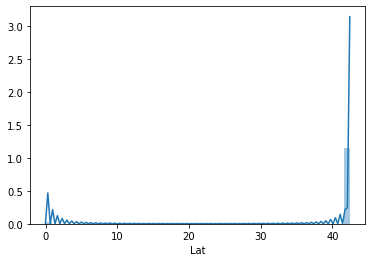

In [30]:
# Figure out the distribution of numerical variables that have missing values

sns.distplot(data2019["Lat"])
plt.show()

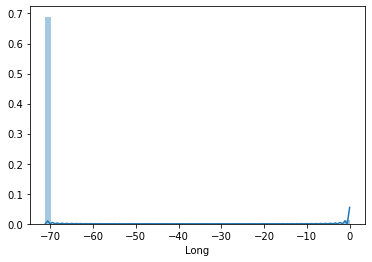

In [31]:
sns.distplot(data2019["Long"])
plt.show()

In [32]:
# Because the histogram for both "Lat" and "Long" doesn't follow normal distribution, then we impute it using Median

data2019['Lat'] = data2019['Lat'].fillna(data2019['Lat'].median())
data2019['Long'] = data2019['Long'].fillna(data2019['Long'].median())

In [33]:
data2019.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
STREET                 0
Lat                    0
Long                   0
Location               0
Len_IN                 0
dtype: int64

#### Because there is no missing values in entire variables, then the data cleaning for dataset Crime 2019 has done.

In [34]:
data2019.index = np.arange(1, len(data2019)+1)
data2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19779 entries, 1 to 19779
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      19779 non-null  object 
 1   OFFENSE_CODE         19779 non-null  object 
 2   OFFENSE_DESCRIPTION  19779 non-null  object 
 3   DISTRICT             19779 non-null  object 
 4   REPORTING_AREA       19779 non-null  object 
 5   SHOOTING             19779 non-null  float64
 6   OCCURRED_ON_DATE     19779 non-null  object 
 7   YEAR                 19779 non-null  float64
 8   MONTH                19779 non-null  float64
 9   DAY_OF_WEEK          19779 non-null  object 
 10  HOUR                 19779 non-null  float64
 11  STREET               19779 non-null  object 
 12  Lat                  19779 non-null  float64
 13  Long                 19779 non-null  float64
 14  Location             19779 non-null  object 
 15  Len_IN               19779 non-null 

### Crime 2020

In [35]:
# Importing Dataset

data2020 = pd.read_csv("Crime2020.csv")
data2020.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,854652314,3115,NaN,INVESTIGATE PERSON,B2,289,0.0,2/20/2020 0:00,2020.0,2.0,Thursday,0.0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,457856954,3115,NaN,INVESTIGATE PERSON,B2,289,0.0,2/21/2020 1:42,2020.0,2.0,Friday,1.0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,302030654,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0.0,4/24/2020 13:00,2020.0,4.0,Friday,13.0,NaN,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,212025777,1108,NaN,FRAUD - WELFARE,A7,28,0.0,5/1/2020 0:00,2020.0,5.0,Friday,0.0,NaN,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,212025557,2670,NaN,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0.0,9/7/2020 0:00,2020.0,9.0,Monday,0.0,NaN,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"


In [36]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53710 entries, 0 to 53709
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      53710 non-null  object 
 1   OFFENSE_CODE         48965 non-null  object 
 2   OFFENSE_CODE_GROUP   4975 non-null   float64
 3   OFFENSE_DESCRIPTION  48779 non-null  object 
 4   DISTRICT             43647 non-null  object 
 5   REPORTING_AREA       43804 non-null  object 
 6   SHOOTING             43804 non-null  float64
 7   OCCURRED_ON_DATE     43804 non-null  object 
 8   YEAR                 43803 non-null  float64
 9   MONTH                43803 non-null  float64
 10  DAY_OF_WEEK          43803 non-null  object 
 11  HOUR                 43803 non-null  float64
 12  UCR_PART             0 non-null      float64
 13  STREET               43802 non-null  object 
 14  Lat                  38642 non-null  float64
 15  Long                 38642 non-null 

In [37]:
data2020.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE            4745
OFFENSE_CODE_GROUP     48735
OFFENSE_DESCRIPTION     4931
DISTRICT               10063
REPORTING_AREA          9906
SHOOTING                9906
OCCURRED_ON_DATE        9906
YEAR                    9907
MONTH                   9907
DAY_OF_WEEK             9907
HOUR                    9907
UCR_PART               53710
STREET                  9908
Lat                    15068
Long                   15068
Location               15068
dtype: int64

#### "UCR_PART" variable have missing values on entire row, then we can delete that variable. That because we have no information about the real data of "UCR_PART", so we didn't have any references to impute the missing value

In [38]:
data2020.drop(['UCR_PART'], axis=1, inplace=True)

#### Imputing missing value with more than 90% of the values missing -> "OFFENSE_CODE_GROUP" = 48,735/53,710 = 90.7%

Same with the reason of dropping  "SHOOTING" variable on dataset Crime 2018 to avoid the 'considerable bias', then I decide to deleting "OFFENSE_CODE_GROUP" that have missing values with proportion more than 90%.

In [39]:
data2020.drop(['OFFENSE_CODE_GROUP'], axis=1, inplace=True)

In [40]:
data2020.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE            4745
OFFENSE_DESCRIPTION     4931
DISTRICT               10063
REPORTING_AREA          9906
SHOOTING                9906
OCCURRED_ON_DATE        9906
YEAR                    9907
MONTH                   9907
DAY_OF_WEEK             9907
HOUR                    9907
STREET                  9908
Lat                    15068
Long                   15068
Location               15068
dtype: int64

Same with the step for dataset Crime 2019.

#### Because there were missing values for (almost) all of variables, we can start by identifying each variables starting by the "INCIDENT_NUMBER", does the style of "INCIDENT_NUMBER" are same of each others and is there incorrect input data?

Here are the step to identify "INCIDENT_NUMBER":
1. Check the length of column ("INCIDENT_NUMBER")
2. As we learn from data 2018 that the correct "INCIDENT_NUMBER" have the same length of each others, so to decide the correct length of "INCIDENT_NUMBER", we can calculate the count of each length.

In [41]:
data2020['Len_IN'] = data2020['INCIDENT_NUMBER'].map(lambda calc: len(calc))
data2020

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Len_IN
0,854652314,3115,INVESTIGATE PERSON,B2,289,0.0,2/20/2020 0:00,2020.0,2.0,Thursday,0.0,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",9
1,457856954,3115,INVESTIGATE PERSON,B2,289,0.0,2/21/2020 1:42,2020.0,2.0,Friday,1.0,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",9
2,302030654,1106,FRAUD - CREDIT CARD / ATM FRAUD,D4,167,0.0,4/24/2020 13:00,2020.0,4.0,Friday,13.0,MASSACHUSETTS AVE,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)",9
3,212025777,1108,FRAUD - WELFARE,A7,28,0.0,5/1/2020 0:00,2020.0,5.0,Friday,0.0,TRENTON ST,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)",9
4,212025557,2670,HARASSMENT/ CRIMINAL HARASSMENT,A1,77,0.0,9/7/2020 0:00,2020.0,9.0,Monday,0.0,PRINCE ST,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53705,DORCHESTER MA 02122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
53706,"UNITED STATES""",42.29755533,"(42.2975553295965, -71.0597091024257)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
53707,202037980,1402,VANDALISM,C11,355,0.0,5/30/2020 12:00,2020.0,5.0,Saturday,12.0,GRAMPIAN WAY,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)",9
53708,202037979,1107,FRAUD - IMPERSONATION,E18,691,0.0,5/22/2020 0:00,2020.0,5.0,Friday,0.0,PIERCE ST,42.287094,-71.148221,"(42.2870935525911, -71.1482212837716)",9


In [42]:
data2020.groupby(['Len_IN']).count()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
Len_IN,,,,,,,,,,,,,,,
2,222,222,222,0,0,0,0,0,0,0,0,0,0,0,0
3,298,298,298,0,0,0,0,0,0,0,0,0,0,0,0
4,301,301,301,0,0,0,0,0,0,0,0,0,0,0,0
5,363,363,363,0,0,0,0,0,0,0,0,0,0,0,0
6,426,426,426,0,0,0,0,0,0,0,0,0,0,0,0
7,375,375,374,0,0,0,0,0,0,0,0,0,0,0,0
8,435,435,435,2,2,2,2,2,2,2,2,2,2,2,2
9,44141,44141,44141,43645,43802,43802,43802,43801,43801,43801,43801,43800,38640,38640,38640
10,312,312,312,0,0,0,0,0,0,0,0,0,0,0,0


#### Regarding to the result of count the data based on the length of "INCIDENT_NUMBER", so we can conclude that the right  "INCIDENT_NUMBER" have the "Len_IN" = 9. The next step is delete the row which have the "Len_IN" not equal to 9.

In [43]:
data2020 = data2020[data2020['Len_IN'] == 9]

In [44]:
data2020.isnull().sum()

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_DESCRIPTION       0
DISTRICT                496
REPORTING_AREA          339
SHOOTING                339
OCCURRED_ON_DATE        339
YEAR                    340
MONTH                   340
DAY_OF_WEEK             340
HOUR                    340
STREET                  341
Lat                    5501
Long                   5501
Location               5501
Len_IN                    0
dtype: int64

#### To make sure that the existing data have the correct value of "INCIDENT_NUMBER", we can check it by sorting the data, if is there any data who have "Len_IN" = 9 but with string values (as we know that the correct IN is only numerical, not string).

In [45]:
data2020.sort_values(by='INCIDENT_NUMBER', ascending=False).head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Len_IN
27239,"UNITED S""",42.343487,"(42.3434869973729, -71.0946050451078)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
16908,"UNITED S""",42.310594,"(42.3105939993857, -71.0832530070412)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
16468,"UNITED S""",42.35419298,"(42.3541929786005, -71.1503270360801)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
52675,"UNITED S""",42.33491204,"(42.3349120386162, -71.0884639778824)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
16562,"UNITED S""",42.33800201,"(42.3380020071396, -71.085252050778)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


#### From the heading of the dataframe, we can see that there is still incorrect INCIDENT_NUMBER which consist of string values. So, we can drop the row with have the string values (UNITED S") as their INCIDENT_NUMBER.

In [46]:
data2020 = data2020[data2020["INCIDENT_NUMBER"] != 'UNITED S"']

In [47]:
data2020.sort_values(by='INCIDENT_NUMBER', ascending=False).head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Len_IN
30617,"ROXBURY """,42.31915701,"(42.3191570085315, -71.0860200580124)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
25230,"ROXBURY """,42.31915701,"(42.3191570085315, -71.0860200580124)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
51676,"ROXBURY """,42.31915701,"(42.3191570085315, -71.0860200580124)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
0,854652314,3115,INVESTIGATE PERSON,B2,289,0.0,2/20/2020 0:00,2020.0,2.0,Thursday,0.0,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",9
1,457856954,3115,INVESTIGATE PERSON,B2,289,0.0,2/21/2020 1:42,2020.0,2.0,Friday,1.0,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)",9


#### There is still INCIDENT_NUMBER (IN) which string values, then we can delete the row that have string values (ROXBURY ")  as their IN.

In [48]:
data2020 = data2020[data2020["INCIDENT_NUMBER"] != 'ROXBURY "']

In [49]:
data2020.isnull().sum()

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_DESCRIPTION       0
DISTRICT                157
REPORTING_AREA            0
SHOOTING                  0
OCCURRED_ON_DATE          0
YEAR                      1
MONTH                     1
DAY_OF_WEEK               1
HOUR                      1
STREET                    2
Lat                    5162
Long                   5162
Location               5162
Len_IN                    0
dtype: int64

#### Imputing missing values based on the type of data, for categorical variable using 'Mode', for numerical with normal distribution using 'Mean' and for numerical with skewness using "Median".

Actually the data type of "YEAR", "MONTH", and "HOUR" are integer, because those variable only have exact values not float anymore. So, we use imputation method of categorical data type for those variables.

In [50]:
# Imputing Categorical Variable

data2020['DISTRICT'].fillna((data2020.DISTRICT.mode())[0], inplace=True)
data2020['YEAR'].fillna((data2020.YEAR.mode())[0], inplace=True)
data2020['MONTH'].fillna((data2020.MONTH.mode())[0], inplace=True)
data2020['DAY_OF_WEEK'].fillna((data2020.DAY_OF_WEEK.mode())[0], inplace=True)
data2020['HOUR'].fillna((data2020.HOUR.mode())[0], inplace=True)
data2020['STREET'].fillna((data2020.STREET.mode())[0], inplace=True)
data2020['Location'].fillna((data2020.Location.mode())[0], inplace=True)

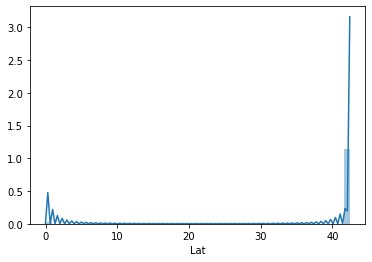

In [51]:
# Figure out the distribution of numerical variables that have missing values

sns.distplot(data2020["Lat"])
plt.show()

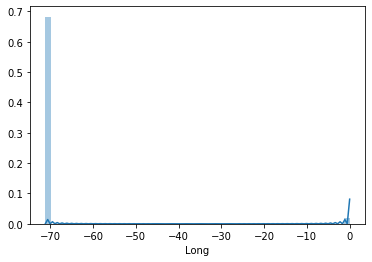

In [52]:
sns.distplot(data2020["Long"])
plt.show()

In [53]:
# Because the histogram for both "Lat" and "Long" doesn't follow normal distribution, then we impute it using Median

data2020['Lat'] = data2020['Lat'].fillna(data2020['Lat'].median())
data2020['Long'] = data2020['Long'].fillna(data2020['Long'].median())

In [54]:
data2020.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
STREET                 0
Lat                    0
Long                   0
Location               0
Len_IN                 0
dtype: int64

#### Because there is no missing values in entire variables, then the data cleaning for dataset Crime 2020 has done.

In [55]:
data2020.index = np.arange(1, len(data2020)+1)
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43802 entries, 1 to 43802
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      43802 non-null  object 
 1   OFFENSE_CODE         43802 non-null  object 
 2   OFFENSE_DESCRIPTION  43802 non-null  object 
 3   DISTRICT             43802 non-null  object 
 4   REPORTING_AREA       43802 non-null  object 
 5   SHOOTING             43802 non-null  float64
 6   OCCURRED_ON_DATE     43802 non-null  object 
 7   YEAR                 43802 non-null  float64
 8   MONTH                43802 non-null  float64
 9   DAY_OF_WEEK          43802 non-null  object 
 10  HOUR                 43802 non-null  float64
 11  STREET               43802 non-null  object 
 12  Lat                  43802 non-null  float64
 13  Long                 43802 non-null  float64
 14  Location             43802 non-null  object 
 15  Len_IN               43802 non-null 

## >> Data Blending

Before we blend the dataset, we need to know the dimension of each dataset then determine which variables that will use for blend dataset Crime2018, Crime2019 and Crime2020 by looking at the variable that available on those dataset.

In [56]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98888 entries, 1 to 98888
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      98888 non-null  object 
 1   OFFENSE_CODE         98888 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null  object 
 3   OFFENSE_DESCRIPTION  98888 non-null  object 
 4   DISTRICT             98888 non-null  object 
 5   REPORTING_AREA       98888 non-null  object 
 6   OCCURRED_ON_DATE     98888 non-null  object 
 7   YEAR                 98888 non-null  int64  
 8   MONTH                98888 non-null  int64  
 9   DAY_OF_WEEK          98888 non-null  object 
 10  HOUR                 98888 non-null  int64  
 11  UCR_PART             98888 non-null  object 
 12  STREET               98888 non-null  object 
 13  Lat                  98888 non-null  float64
 14  Long                 98888 non-null  float64
 15  Location             98888 non-null 

In [57]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19779 entries, 1 to 19779
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      19779 non-null  object 
 1   OFFENSE_CODE         19779 non-null  object 
 2   OFFENSE_DESCRIPTION  19779 non-null  object 
 3   DISTRICT             19779 non-null  object 
 4   REPORTING_AREA       19779 non-null  object 
 5   SHOOTING             19779 non-null  float64
 6   OCCURRED_ON_DATE     19779 non-null  object 
 7   YEAR                 19779 non-null  float64
 8   MONTH                19779 non-null  float64
 9   DAY_OF_WEEK          19779 non-null  object 
 10  HOUR                 19779 non-null  float64
 11  STREET               19779 non-null  object 
 12  Lat                  19779 non-null  float64
 13  Long                 19779 non-null  float64
 14  Location             19779 non-null  object 
 15  Len_IN               19779 non-null 

In [58]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43802 entries, 1 to 43802
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      43802 non-null  object 
 1   OFFENSE_CODE         43802 non-null  object 
 2   OFFENSE_DESCRIPTION  43802 non-null  object 
 3   DISTRICT             43802 non-null  object 
 4   REPORTING_AREA       43802 non-null  object 
 5   SHOOTING             43802 non-null  float64
 6   OCCURRED_ON_DATE     43802 non-null  object 
 7   YEAR                 43802 non-null  float64
 8   MONTH                43802 non-null  float64
 9   DAY_OF_WEEK          43802 non-null  object 
 10  HOUR                 43802 non-null  float64
 11  STREET               43802 non-null  object 
 12  Lat                  43802 non-null  float64
 13  Long                 43802 non-null  float64
 14  Location             43802 non-null  object 
 15  Len_IN               43802 non-null 

#### Based on the information of each dataset, we conclude that there are 3 variables that should be remove before we blend the data, and they are:
- OFFENSE_CODE_GROUP in Crime2018
- UCR_PART in Crime2018
- SHOOTING in Crime2019
- Len_IN in Crime2019
- SHOOTING in Crime2020
- Len_IN in Crime2020

In [59]:
data2018.drop(['OFFENSE_CODE_GROUP', 'UCR_PART'], axis=1, inplace=True)
data2019.drop(['SHOOTING', 'Len_IN'], axis=1, inplace=True)
data2020.drop(['SHOOTING', 'Len_IN'], axis=1, inplace=True)

In [60]:
datacrime = data2018
datacrime = datacrime.append(data2019)
datacrime = datacrime.append(data2020)

### The total of rows after blending the data are 98,888 + 19,779 + 43,802 = 162,469

In [61]:
datacrime.index = np.arange(1, len(datacrime)+1)
datacrime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162469 entries, 1 to 162469
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      162469 non-null  object 
 1   OFFENSE_CODE         162469 non-null  object 
 2   OFFENSE_DESCRIPTION  162469 non-null  object 
 3   DISTRICT             162469 non-null  object 
 4   REPORTING_AREA       162469 non-null  object 
 5   OCCURRED_ON_DATE     162469 non-null  object 
 6   YEAR                 162469 non-null  float64
 7   MONTH                162469 non-null  float64
 8   DAY_OF_WEEK          162469 non-null  object 
 9   HOUR                 162469 non-null  float64
 10  STREET               162469 non-null  object 
 11  Lat                  162469 non-null  float64
 12  Long                 162469 non-null  float64
 13  Location             162469 non-null  object 
dtypes: float64(5), object(9)
memory usage: 18.6+ MB


#### Before do the analysis using SQL, we need to export the "datacrime" into CSV.

In [64]:
datacrime.to_csv("datacrime.csv")

# JAWABAN NO.5 (Python)

In [1]:
# Import function that will use for this analysis

import pandas as pd
import numpy as np

In [54]:
datacrime1 = pd.read_csv("datacrime.csv", index_col=0)
datacrime1.head()

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
1,I192077559,3115,INVESTIGATE PERSON,B3,468,4/30/2018 9:00,2018.0,4.0,Monday,9.0,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
2,I192077332,619,LARCENY ALL OTHERS,E18,496,3/6/2018 8:00,2018.0,3.0,Tuesday,8.0,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
3,I192076660,2629,HARASSMENT,E5,662,10/31/2018 12:00,2018.0,10.0,Wednesday,12.0,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
4,I192075386,2629,HARASSMENT,A1,96,4/9/2018 8:43,2018.0,4.0,Monday,8.0,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
5,I192075335,3208,PROPERTY - MISSING,D4,132,1/1/2018 0:00,2018.0,1.0,Monday,0.0,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


In [4]:
datacrime1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162469 entries, 1 to 162469
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      162469 non-null  object 
 1   OFFENSE_CODE         162469 non-null  int64  
 2   OFFENSE_DESCRIPTION  162469 non-null  object 
 3   DISTRICT             162469 non-null  object 
 4   REPORTING_AREA       162469 non-null  object 
 5   OCCURRED_ON_DATE     162469 non-null  object 
 6   YEAR                 162469 non-null  float64
 7   MONTH                162469 non-null  float64
 8   DAY_OF_WEEK          162469 non-null  object 
 9   HOUR                 162469 non-null  float64
 10  STREET               162469 non-null  object 
 11  Lat                  162469 non-null  float64
 12  Long                 162469 non-null  float64
 13  Location             162469 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 18.6+ MB


### Sebutkan distrik mana (A/B/C/D/E, tanpa nomor) yang memiliki angka tindak kriminal yang paling tinggi!

In [68]:
datacrime1["CODE_DISTRICT"] = datacrime1["DISTRICT"].str.get(0)
datacrime1.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,CODE_DISTRICT
1,I192077559,3115,INVESTIGATE PERSON,B3,468,4/30/2018 9:00,2018.0,4.0,Monday,9.0,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",B
2,I192077332,619,LARCENY ALL OTHERS,E18,496,3/6/2018 8:00,2018.0,3.0,Tuesday,8.0,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",E
3,I192076660,2629,HARASSMENT,E5,662,10/31/2018 12:00,2018.0,10.0,Wednesday,12.0,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",E
4,I192075386,2629,HARASSMENT,A1,96,4/9/2018 8:43,2018.0,4.0,Monday,8.0,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",A
5,I192075335,3208,PROPERTY - MISSING,D4,132,1/1/2018 0:00,2018.0,1.0,Monday,0.0,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",D


In [47]:
code_district_sort = datacrime1.groupby('CODE_DISTRICT', as_index=False).count()
code_district_sort.sort_values(by='INCIDENT_NUMBER', ascending=False)

,CODE_DISTRICT,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
1,B,44266,44266,44266,44266,44266,44266,44266,44266,44266,44266,44266,44266,44266,44266
2,C,33314,33314,33314,33314,33314,33314,33314,33314,33314,33314,33314,33314,33314,33314
3,D,31271,31271,31271,31271,31271,31271,31271,31271,31271,31271,31271,31271,31271,31271
0,A,27794,27794,27794,27794,27794,27794,27794,27794,27794,27794,27794,27794,27794,27794
4,E,25824,25824,25824,25824,25824,25824,25824,25824,25824,25824,25824,25824,25824,25824


Dari tabel di atas dapat diketahui bahwa "District B" memiliki angka kriminalitas tertinggi dibanding District lain. 

### Sebutkan 3 jenis tindak kriminal yang terjadi pada tahun 2020 namun tidak terjadi di tahun 2019!

In [40]:
datafilter2019 = datacrime1 [datacrime1["YEAR"] == 2019]
datafilter2020 = datacrime1 [datacrime1["YEAR"] == 2020]

In [41]:
datafilter = datafilter2020
datafilter = datafilter.append(datafilter2019)

In [42]:
datafilter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63581 entries, 118668 to 118667
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      63581 non-null  object 
 1   OFFENSE_CODE         63581 non-null  int64  
 2   OFFENSE_DESCRIPTION  63581 non-null  object 
 3   DISTRICT             63581 non-null  object 
 4   REPORTING_AREA       63581 non-null  object 
 5   OCCURRED_ON_DATE     63581 non-null  object 
 6   YEAR                 63581 non-null  float64
 7   MONTH                63581 non-null  float64
 8   DAY_OF_WEEK          63581 non-null  object 
 9   HOUR                 63581 non-null  float64
 10  STREET               63581 non-null  object 
 11  Lat                  63581 non-null  float64
 12  Long                 63581 non-null  float64
 13  Location             63581 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 7.3+ MB


In [43]:
datafilter = datafilter.drop_duplicates(subset ="OFFENSE_DESCRIPTION", keep = False)

In [44]:
datafilter.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
145788,202060624,99999,Evidence Tracker Incidents,E18,520,8/20/2020 9:00,2020.0,8.0,Thursday,9.0,HYDE PARK AVE,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)"
113398,192085897,3203,FIREARM/WEAPON - LOST,B3,434,10/21/2019 2:00,2019.0,10.0,Monday,2.0,THETFORD AVE,42.284660,-71.078400,"(42.2846599101962, -71.078399968595)"
118580,192078622,600,Migrated Report - Other Larceny,C6,,9/29/2019 3:04,2019.0,9.0,Sunday,3.0,W BROADWAY,0.000000,0.000000,"(0, 0)"


Tabel datafilter di atas menunjukkan bahwa 3 kejahatan yang terjadi di tahun 2020 namun tidak terjadi di tahun 2019 adalah

- Evidence Tracker Incidents
- FIREARM/WEAPON LOST
- Migrated Report - Other Larceny

### Apakah kelompok tindak kriminal yang paling banyak terjadi pada minggu ke 40-45?

In [80]:
# Minggu ke 40-45 sama dengan bulan ke 11 
week_sort = datacrime1[datacrime1["MONTH"] == 11 ]
week_sort = week_sort.groupby('OFFENSE_DESCRIPTION', as_index=False).count()
week_sort.sort_values(by='INCIDENT_NUMBER', ascending=False).head()

,OFFENSE_DESCRIPTION,INCIDENT_NUMBER,OFFENSE_CODE,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,CODE_DISTRICT
85,INVESTIGATE PERSON,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203,1203
106,M/V - LEAVING SCENE - PROPERTY DAMAGE,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086
161,SICK/INJURED/MEDICAL - PERSON,939,939,939,939,939,939,939,939,939,939,939,939,939,939
177,VANDALISM,885,885,885,885,885,885,885,885,885,885,885,885,885,885
86,INVESTIGATE PROPERTY,884,884,884,884,884,884,884,884,884,884,884,884,884,884


Tabel jumlah kriminal berdasarkan "OFFENSE_DESCRIPTION" pada minggu ke 40-45 atau bulan ke 11 menampilkan bahwa jenis kriminal "Investigate Person" merupakan kejahatan yang paling banyak terjadi pada rentang waktu tersebut.

### Sebutkan nama distrik (A/B/C/D/E, tanpa nomor) yang memiliki jumlah tindak kriminal terkecil di akhir pekan!

In [75]:
weekend_sort = datacrime1[datacrime1["DAY_OF_WEEK"] == 'Saturday']
weekend_sort = weekend_sort.append(datacrime1[datacrime1["DAY_OF_WEEK"] == 'Sunday'])

In [76]:
weekend_sort = weekend_sort.groupby('CODE_DISTRICT', as_index=False).count()
weekend_sort.sort_values(by='INCIDENT_NUMBER', ascending=True)

,CODE_DISTRICT,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
4,E,6401,6401,6401,6401,6401,6401,6401,6401,6401,6401,6401,6401,6401,6401
0,A,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595
3,D,8429,8429,8429,8429,8429,8429,8429,8429,8429,8429,8429,8429,8429,8429
2,C,8728,8728,8728,8728,8728,8728,8728,8728,8728,8728,8728,8728,8728,8728
1,B,11603,11603,11603,11603,11603,11603,11603,11603,11603,11603,11603,11603,11603,11603


Melalui tabel mengenai jumlah kriminal pada akhir pekan, diketahui bahwa 
#### district E memiliki jumlah kasus kriminal terendah dibanding district lain.

### Sebutkan nama distrik (A/B/C/D/E, tanpa nomor) yang memiliki jumlah tindak kriminal terbanyak di hari kerja!

In [77]:
weekdays_sort = datacrime1[datacrime1["DAY_OF_WEEK"] == 'Monday']
weekdays_sort = weekdays_sort.append(datacrime1[datacrime1["DAY_OF_WEEK"] == 'Tuesday'])
weekdays_sort = weekdays_sort.append(datacrime1[datacrime1["DAY_OF_WEEK"] == 'Wednesday'])
weekdays_sort = weekdays_sort.append(datacrime1[datacrime1["DAY_OF_WEEK"] == 'Thursday'])
weekdays_sort = weekdays_sort.append(datacrime1[datacrime1["DAY_OF_WEEK"] == 'Friday'])

In [78]:
weekdays_sort = weekdays_sort.groupby('CODE_DISTRICT', as_index=False).count()
weekdays_sort.sort_values(by='INCIDENT_NUMBER', ascending=False)

,CODE_DISTRICT,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
1,B,32663,32663,32663,32663,32663,32663,32663,32663,32663,32663,32663,32663,32663,32663
2,C,24586,24586,24586,24586,24586,24586,24586,24586,24586,24586,24586,24586,24586,24586
3,D,22842,22842,22842,22842,22842,22842,22842,22842,22842,22842,22842,22842,22842,22842
0,A,20199,20199,20199,20199,20199,20199,20199,20199,20199,20199,20199,20199,20199,20199
4,E,19423,19423,19423,19423,19423,19423,19423,19423,19423,19423,19423,19423,19423,19423


Melalui tabel mengenai jumlah kriminal pada hari kerja, diketahui bahwa 
#### district B memiliki jumlah kasus kriminal tertinggi dibanding district lain.

# JAWABAN NO.6 (Machine Learning)

In [1]:
# Import function that will use for this analysis

import pandas as pd
import numpy as np

In [2]:
datacrime2 = pd.read_csv("datacrime.csv", index_col=0)
datacrime2.head()

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
1,I192077559,3115,INVESTIGATE PERSON,B3,468,4/30/2018 9:00,2018.0,4.0,Monday,9.0,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
2,I192077332,619,LARCENY ALL OTHERS,E18,496,3/6/2018 8:00,2018.0,3.0,Tuesday,8.0,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
3,I192076660,2629,HARASSMENT,E5,662,10/31/2018 12:00,2018.0,10.0,Wednesday,12.0,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
4,I192075386,2629,HARASSMENT,A1,96,4/9/2018 8:43,2018.0,4.0,Monday,8.0,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
5,I192075335,3208,PROPERTY - MISSING,D4,132,1/1/2018 0:00,2018.0,1.0,Monday,0.0,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


In [3]:
datacrime2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162469 entries, 1 to 162469
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      162469 non-null  object 
 1   OFFENSE_CODE         162469 non-null  int64  
 2   OFFENSE_DESCRIPTION  162469 non-null  object 
 3   DISTRICT             162469 non-null  object 
 4   REPORTING_AREA       162469 non-null  object 
 5   OCCURRED_ON_DATE     162469 non-null  object 
 6   YEAR                 162469 non-null  float64
 7   MONTH                162469 non-null  float64
 8   DAY_OF_WEEK          162469 non-null  object 
 9   HOUR                 162469 non-null  float64
 10  STREET               162469 non-null  object 
 11  Lat                  162469 non-null  float64
 12  Long                 162469 non-null  float64
 13  Location             162469 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 18.6+ MB


### >> Lakukan pemodelan dengan salah satu algoritma machine learning untuk dapat memprediksi suatu kejadian kejahatan tertentu terjadi di jam berapa! (Berikan komentar di setiap step pengolahan data dan tampilkan ukuran kebaikan model data test seperti MSE, MAPE, Akurasi, atau yang lainnya)

## Decision Tree

In [4]:
datacrimeSVR = datacrime2

In [5]:
datacrimeSVR.drop(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR', 'STREET', 'Lat', 'Long', 'Location'], axis=1, inplace=True)

In [6]:
datacrimeSVR.head(30)

,OFFENSE_DESCRIPTION,DISTRICT,MONTH,DAY_OF_WEEK,HOUR
1,INVESTIGATE PERSON,B3,4.0,Monday,9.0
2,LARCENY ALL OTHERS,E18,3.0,Tuesday,8.0
3,HARASSMENT,E5,10.0,Wednesday,12.0
4,HARASSMENT,A1,4.0,Monday,8.0
5,PROPERTY - MISSING,D4,1.0,Monday,0.0
6,HARASSMENT,E5,10.0,Monday,9.0
7,FRAUD - IMPERSONATION,B3,11.0,Sunday,9.0
8,HARASSMENT,B2,1.0,Monday,0.0
9,LARCENY ALL OTHERS,D4,10.0,Monday,0.0
10,LARCENY ALL OTHERS,C11,5.0,Thursday,0.0


In [7]:
datacrimeSVR["HOUR"] = datacrimeSVR.HOUR.astype(int)
datacrimeSVR["MONTH"] = datacrimeSVR.MONTH.astype(int)

In [8]:
# Transformasi Variabel Kategorik

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
aa=le.fit(datacrimeSVR.iloc[0:,0])
a=le.transform(datacrimeSVR.iloc[0:,0])
bb=le.fit(datacrimeSVR.iloc[0:,1])
b=le.transform(datacrimeSVR.iloc[0:,1])
cc=le.fit(datacrimeSVR.iloc[0:,3])
c=le.transform(datacrimeSVR.iloc[0:,3])

datacrimeSVR['OFFENSE_DESCRIPTION']=a
datacrimeSVR['DISTRICT']=b
datacrimeSVR['DAY_OF_WEEK']=c
datacrimeSVR.head(30)

,OFFENSE_DESCRIPTION,DISTRICT,MONTH,DAY_OF_WEEK,HOUR
1,99,4,4,1,9
2,107,10,3,5,8
3,92,11,10,6,12
4,92,0,4,1,8
5,171,8,1,1,0
6,92,11,10,1,9
7,86,4,11,3,9
8,92,3,1,1,0
9,107,8,10,1,0
10,107,5,5,4,0


In [9]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
# Mengimpor dataset
X = datacrimeSVR.iloc[:, 0:4].values
Y = datacrimeSVR.iloc[:, 4].values
Y

array([ 9,  8, 12, ..., 12,  0,  0])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=11)

In [12]:
clf_gini = tree.DecisionTreeClassifier(criterion = "gini", max_depth=5, min_samples_leaf=5)
clf_gini = clf_gini.fit(X_train, y_train)

In [13]:
clf_entropy = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=None, min_samples_leaf=2)
clf_entropy = clf_entropy.fit(X_train, y_train)

#### Prediction

In [14]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array([12, 17, 16, ..., 17, 16, 18])

In [15]:
y_pred_info = clf_entropy.predict(X_test)
y_pred_info

array([16,  8, 13, ..., 13, 12,  7])

In [17]:
# Ukuran Kebaikan Model menggunakan Akurasi

print("Akurasi untuk metode 'gini' adalah sebesar ", accuracy_score(y_test,y_pred_gini)*100)
print("Akurasi untuk metode 'entropy' adalah sebesar ", accuracy_score(y_test,y_pred_info)*100)

Akurasi untuk metode 'gini' adalah sebesar  7.413676371022343
Akurasi untuk metode 'entropy' adalah sebesar  6.936665230504093


### >> Seorang detektif bernama Shinichi Kudo diberikan tugas untuk melakukan investigasi kejahatan vandalism di district D14. Kejahatan tersebut terjadi di minggu lalu pada hari Kamis bulan Juni. Kira-kira jam berapakah kejahatan itu dilakukan? (Gunakan model yang telah dibuat sebelumnya untuk memprediksi waktu kejadian perkara).

Untuk mendapatkan nilai input yang sesuai dengan model yang dibuat, maka kita dapat menyesuaikan dengan One Hot Encoding yang telah dibuat untuk variabel katergorik, yaitu X1 (baris ke-27), X2 (baris ke-16) dan X4 (baris ke-16).

- X1 = OFFENSE_DESCRIPTION untuk "VANDALISM" = 212
- X2 = DISTRICT untuk "D14" = 7
- X3 = MONTH untuk Juni = 6
- X4 = DAY_OF_WEEK untuk hari "Kamis" = 4

In [18]:
new_X = ([[212, 7, 6, 4]])

In [19]:
y_pred_gini = clf_gini.predict(new_X)
y_pred_info = clf_entropy.predict(new_X)

In [21]:
print("Metode 'gini': Prediksi terjadinya kejahatan Vandalisme di bulan Juni pada hari Kamis di District D14 adalah jam: ", y_pred_gini)
print("Metode 'entropy': Prediksi terjadinya kejahatan Vandalisme di bulan Juni pada hari Kamis di District D14 adalah jam: ", y_pred_info)

Metode 'gini': Prediksi terjadinya kejahatan Vandalisme di bulan Juni pada hari Kamis di District D14 adalah jam:  [20]
Metode 'entropy': Prediksi terjadinya kejahatan Vandalisme di bulan Juni pada hari Kamis di District D14 adalah jam:  [5]
